In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
debai = 2251262571 % 7 + 1
debai

6

Lọc dữ liệu với Publication_Day = Saturday

In [4]:
train_data = df_train[df_train['Publication_Day'] == 'Saturday']
test_data = df_test[df_test['Publication_Day'] == 'Saturday']
train_data.to_csv('df_saturday_train.csv', index=False)
test_data.to_csv('df_saturday_test.csv', index=False)

In [6]:
train = pd.read_csv('df_saturday_train.csv')
test = pd.read_csv('df_saturday_test.csv')

In [7]:
for col in train.columns:
    train[col] = train[col].fillna(train[col].mode()[0])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103505 entries, 0 to 103504
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           103505 non-null  int64  
 1   Podcast_Name                 103505 non-null  object 
 2   Episode_Title                103505 non-null  object 
 3   Episode_Length_minutes       103505 non-null  float64
 4   Genre                        103505 non-null  object 
 5   Host_Popularity_percentage   103505 non-null  float64
 6   Publication_Day              103505 non-null  object 
 7   Publication_Time             103505 non-null  object 
 8   Guest_Popularity_percentage  103505 non-null  float64
 9   Number_of_Ads                103505 non-null  float64
 10  Episode_Sentiment            103505 non-null  object 
 11  Listening_Time_minutes       103505 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 9.5+ MB


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
col = ["Podcast_Name","Episode_Title","Genre","Publication_Day","Publication_Time","Episode_Sentiment"]
for col in col:
    train[col] = label_encoder.fit_transform(train[col])


   Predicted_Listening_Time
0                 45.207720
1                 45.313649
2                 45.313986
3                 45.313987
4                 45.313987


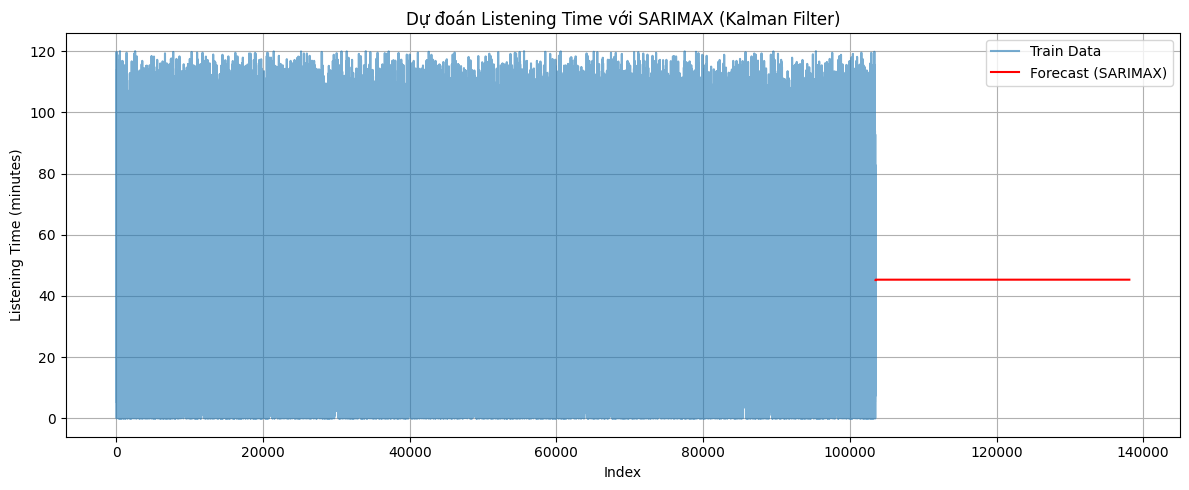

In [23]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


train_series = train['Listening_Time_minutes'].dropna()
# train_series = train.drop(columns=["Listening_Time_minutes"])
test_len = len(test)

model = SARIMAX(train_series, order=(1, 1, 1),)
result = model.fit(disp=False)

forecast = result.forecast(steps=test_len)

# Gắn kết quả dự báo vào test set nếu muốn
test2 = test.copy()
test2["Predicted_Listening_Time"] = forecast.values

# Hiển thị kết quả
print(test2[["Predicted_Listening_Time"]].head())

# Vẽ biểu đồ nếu cần
plt.figure(figsize=(12, 5))
plt.plot(train_series.values, label="Train Data", alpha=0.6)
plt.plot(range(len(train_series), len(train_series) + test_len), forecast, label="Forecast (SARIMAX)", color="red")
plt.title("Dự đoán Listening Time với SARIMAX (Kalman Filter)")
plt.xlabel("Index")
plt.ylabel("Listening Time (minutes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
test2

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Predicted_Listening_Time
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral,45.207720
1,750010,Finance Focus,Episode 31,23.20,Business,32.20,Saturday,Evening,20.21,2.0,Neutral,45.313649
2,750012,Crime Chronicles,Episode 30,49.86,True Crime,57.37,Saturday,Morning,NaN,2.0,Negative,45.313986
3,750018,Sports Weekly,Episode 70,88.96,Sports,52.81,Saturday,Afternoon,43.81,2.0,Neutral,45.313987
4,750039,Fitness First,Episode 79,36.37,Health,40.32,Saturday,Night,52.52,0.0,Neutral,45.313987
...,...,...,...,...,...,...,...,...,...,...,...,...
34602,999976,Life Lessons,Episode 85,NaN,Lifestyle,86.53,Saturday,Night,93.53,1.0,Negative,45.313987
34603,999981,Digital Digest,Episode 61,62.66,Technology,70.32,Saturday,Evening,59.09,2.0,Negative,45.313987
34604,999993,Health Hour,Episode 73,5.41,Health,98.00,Saturday,Evening,31.70,1.0,Neutral,45.313987
34605,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative,45.313987


In [26]:
test2.to_csv('test2.csv', index=False)